# Defining and Training KernelRidge Model

In [1]:
#import libraries
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
df=pd.read_csv('/kaggle/input/nsei-prev-data/in_nsei_daily.csv',index_col='minute', parse_dates=True)
df.index = df.index.to_pydatetime()
df.shape

(1478, 6)

In [3]:
df = pd.DataFrame(df)
df

,ticker,instrument_token,open,high,low,close
2017-01-02 09:15:00+05:30,NSEI,uf-n-1647516806122,8211.70,8211.70,8134.30,8178.70
2017-01-03 09:15:00+05:30,NSEI,uf-n-1647516806122,8195.25,8219.00,8148.65,8188.60
2017-01-04 09:15:00+05:30,NSEI,uf-n-1647516806122,8201.60,8218.45,8180.95,8196.55
2017-01-05 09:15:00+05:30,NSEI,uf-n-1647516806122,8227.75,8282.55,8223.90,8269.90
2017-01-06 09:15:00+05:30,NSEI,uf-n-1647516806122,8283.50,8306.50,8233.45,8247.85
...,...,...,...,...,...,...
2022-12-26 09:15:00+05:30,NSEI,uf-n-1647516806122,17832.90,18084.10,17774.25,18010.30
2022-12-27 09:15:00+05:30,NSEI,uf-n-1647516806122,18081.90,18149.25,17967.45,18136.00
2022-12-28 09:15:00+05:30,NSEI,uf-n-1647516806122,18093.00,18173.10,18068.35,18109.25
2022-12-29 09:15:00+05:30,NSEI,uf-n-1647516806122,18059.80,18229.70,17992.80,18207.10


In [4]:
#define the feature columns and target column
features = ['open', 'high', 'low']
target = 'close'

In [5]:
#train/test split
x=df[features]
y=df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

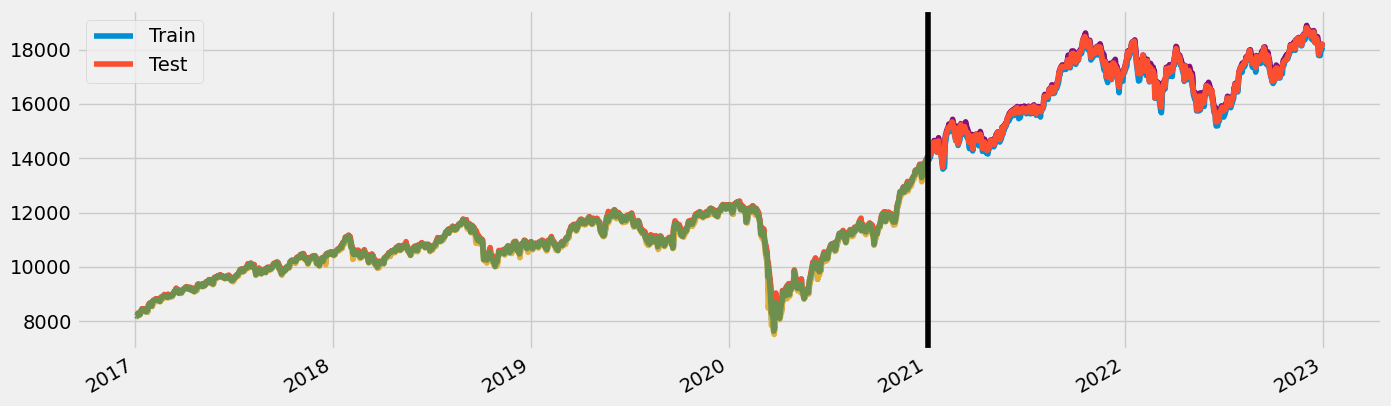

In [6]:
#train/test data plotting
train=df.loc[df.index<'01-01-2021']
test=df.loc[df.index>='31-12-2020']

fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Training Set')
test.plot(ax=ax,label='Test Set')
ax.axvline('01-01-2021',color='black')
ax.legend(['Train','Test'])
plt.show()

In [7]:
#independent and dependent data
ohl = [[0 for j in range(3)] for i in range(len(train.index))]
close_price=[]

In [8]:
j=0
for i in train.index:
    ohl[j][0]=int(train.loc[i].open)
    ohl[j][1]=int(train.loc[i].high)
    ohl[j][2]=int(train.loc[i].low)
    j=j+1
for close in train.close:
    close_price.append(float(close))

In [9]:
#define parameter grid for cross-validation
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf'], 'gamma': [None]}
krr = KernelRidge()
grid_search = GridSearchCV(krr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x, y)
print("Best parameters: ", grid_search.best_params_)
print("MSE score: ", -grid_search.best_score_)

Best parameters:  {'alpha': 0.01, 'gamma': None, 'kernel': 'rbf'}
MSE score:  170211038.71924657


In [10]:
#3 Kernel Ridge Regressor

#using linear kernel
lin_kr=KernelRidge(kernel='linear')
print(lin_kr.fit(x_train,y_train))

#using polynomial kernel
poly_kr=KernelRidge(kernel='poly', degree=3)
print(poly_kr.fit(x_train,y_train))

#using rbf kernel
rbf_kr=KernelRidge(kernel='rbf', gamma=None,alpha= 0.01)
print(rbf_kr.fit(x_train,y_train))

KernelRidge()
KernelRidge(kernel='poly')
KernelRidge(alpha=0.01, kernel='rbf')


In [11]:
#make predictions on the testing data
y_pred_lin = lin_kr.predict(x_test)
y_pred_poly = poly_kr.predict(x_test)
y_pred_rbf = rbf_kr.predict(x_test)

In [12]:
#evaluate model's performance on train data
predict = lin_kr.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9997584845060071
Mean Squared Error: 2172.6339025060456
Root Mean Squared Error: 46.611521134865846
Mean Absolute Error: 30.68775714089375


In [13]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_lin)
mse = mean_squared_error(y_test, y_pred_lin)
rmse = mean_squared_error(y_test, y_pred_lin, squared=False)
mae = mean_absolute_error(y_test, y_pred_lin)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9998215931047357
Mean Squared Error: 1627.9820326579427
Root Mean Squared Error: 40.34825935102954
Mean Absolute Error: 29.076764748440112


In [14]:
#evaluate model's performance on train data
predict = poly_kr.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.97884158222146
Mean Squared Error: 190337.6674889387
Root Mean Squared Error: 436.27705358973293
Mean Absolute Error: 353.1334267710348


In [15]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_poly)
mse = mean_squared_error(y_test, y_pred_poly)
rmse = mean_squared_error(y_test, y_pred_poly, squared=False)
mae = mean_absolute_error(y_test, y_pred_poly)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9795577703349337
Mean Squared Error: 186537.5357432569
Root Mean Squared Error: 431.89991403478757
Mean Absolute Error: 348.10181587837826


In [16]:
#evaluate model's performance on train data
predict = rbf_kr.predict(x_train)
r2 = r2_score(y_train, predict)
mse = mean_squared_error(y_train, predict)
rmse = mean_squared_error(y_train, predict, squared=False)
mae = mean_absolute_error(y_train, predict)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: 0.9981631038654273
Mean Squared Error: 16524.417342237422
Root Mean Squared Error: 128.5473350258084
Mean Absolute Error: 125.07002317700203


In [17]:
#evaluate model's performance on test data
r2 = r2_score(y_test, y_pred_rbf)
mse = mean_squared_error(y_test, y_pred_rbf)
rmse = mean_squared_error(y_test, y_pred_rbf, squared=False)
mae = mean_absolute_error(y_test, y_pred_rbf)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R2 Score: -18.072293267324632
Mean Squared Error: 174036719.3476551
Root Mean Squared Error: 13192.29772813118
Mean Absolute Error: 12841.790325224678


# Predict close price on test OHL(open, high, low)

In [18]:
#predictions for data
test_ohl=test[features]
y_pred_lin = lin_kr.predict(test_ohl)
y_pred_poly = poly_kr.predict(test_ohl)
y_pred_rbf = rbf_kr.predict(test_ohl)

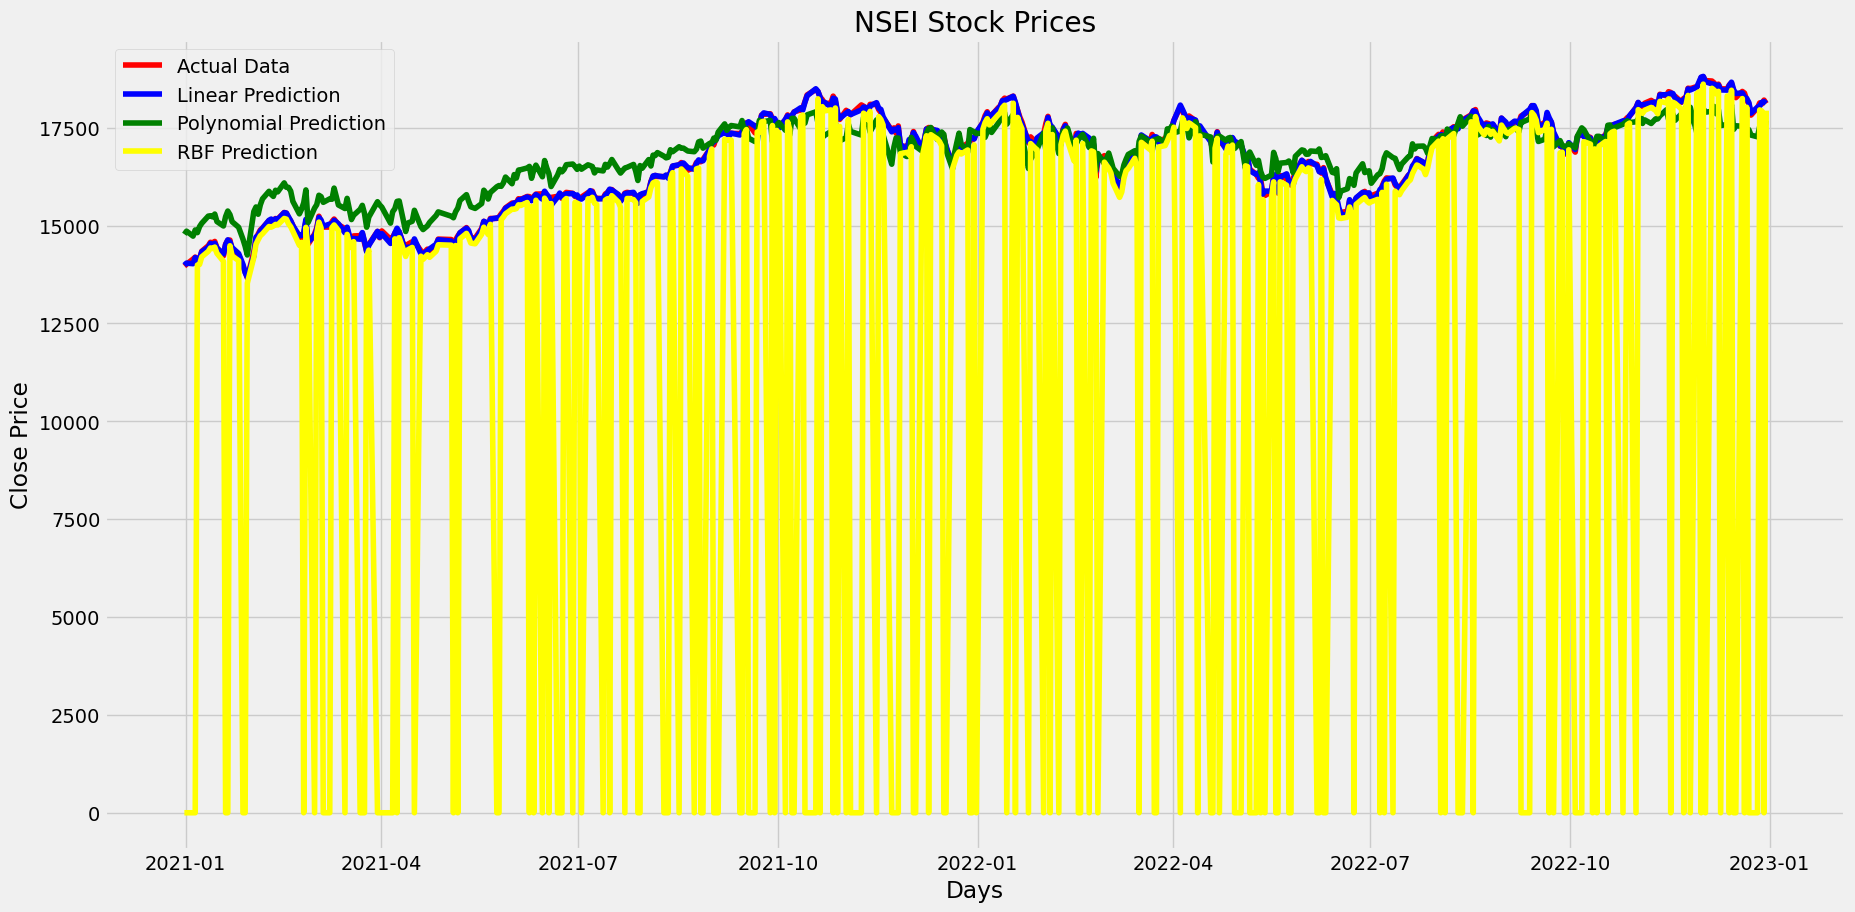

In [19]:
#plotting
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(test.index,test[target], color = 'red', label="Actual Data")
plt.plot(test.index,y_pred_lin, color='blue', label="Linear Prediction")
plt.plot(test.index,y_pred_poly, color='green', label="Polynomial Prediction")
plt.plot(test.index,y_pred_rbf, color='yellow', label="RBF Prediction")

plt.title('NSEI Stock Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [20]:
#getting dataframe
import pytz
lin_data_=[]
poly_data_=[]
rbf_data_=[]
index_ = test.index.tolist()

try:
    for i in range(1,len(index_)):          
        if y_pred_lin[i-1]<test[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            lin_data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred_lin[i-1], 'Pnl':test[index_[i-1].strftime('%Y-%m-%d')].close[0]-test[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            lin_data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred_lin[i-1], 'Pnl':test[index_[i].strftime('%Y-%m-%d')].close[0]-test[index_[i-1].strftime('%Y-%m-%d')].close[0]})         
        if y_pred_poly[i-1]<test[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            poly_data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred_poly[i-1], 'Pnl':test[index_[i-1].strftime('%Y-%m-%d')].close[0]-test[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            poly_data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred_poly[i-1], 'Pnl':test[index_[i].strftime('%Y-%m-%d')].close[0]-test[index_[i-1].strftime('%Y-%m-%d')].close[0]})        
        if y_pred_rbf[i-1]<test[index_[i-1].strftime('%Y-%m-%d')].close[0]:
            direction='SELL'
            rbf_data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred_rbf[i-1], 'Pnl':test[index_[i-1].strftime('%Y-%m-%d')].close[0]-test[index_[i].strftime('%Y-%m-%d')].close[0]})
        else:
            direction='BUY'
            rbf_data_.append({'Date': index_[i-1].strftime('%Y-%m-%d'),'Day': index_[i-1].strftime('%A'), 'Current Close Price': test[index_[i-1].strftime('%Y-%m-%d')].close[0],'Next Day Price': test[index_[i].strftime('%Y-%m-%d')].close[0],'Predicted Direction' : direction,'Predicted Value': y_pred_rbf[i-1], 'Pnl':test[index_[i].strftime('%Y-%m-%d')].close[0]-test[index_[i-1].strftime('%Y-%m-%d')].close[0]})

    
except KeyboardInterrupt or ValueError:
    print("Output is Stored in csv file: NSEI_STOCK.CSV!")

In [21]:
#storing in csv file
import csv
import os

headers = ['Date', 'Day', 'Current Close Price', 'Next Day Price','Predicted Direction', 'Predicted Value','Pnl']

if os.path.exists('/kaggle/working/lin_kr_nsei_stock.csv'):
    with open('lin_kr_nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in lin_data_:
            writer.writerow(row)
else:
    with open('lin_kr_nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in lin_data_:
            writer.writerow(row)
if os.path.exists('/kaggle/working/poly_svr_nsei_stock.csv'):
    with open('poly_kr_nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in poly_data_:
            writer.writerow(row)
else:
    with open('poly_kr_nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in poly_data_:
            writer.writerow(row)
if os.path.exists('/kaggle/working/rbf_svr_nsei_stock.csv'):
    with open('rbf_kr_nsei_stock.csv', mode='a', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        for row in rbf_data_:
            writer.writerow(row)
else:
    with open('rbf_kr_nsei_stock.csv', mode='w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=headers)
        writer.writeheader()
        for row in rbf_data_:
            writer.writerow(row)

# Get Next Day Price

In [22]:
#install yfinance library that helps in stock data retrieval 
!pip install yfinance
import yfinance as yf
from time import time
import datetime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.3 MB/s eta 0:00:00


In [23]:
#to import NSEI stock data, set ticker symbol to ^NSEI
tickerSymbol = '^NSEI'
data = yf.Ticker(tickerSymbol)

In [24]:
#retrieve data from this day one year before to today
end_date = datetime.date.today() - datetime.timedelta(days=1)
start_date = end_date - datetime.timedelta(days=365)
day = datetime.date.today()
stock = data.history(start=start_date, end=end_date)

In [25]:
#last day open, high and low price
stock.iloc[-1][['Open','High','Low']]

Open    17427.949219
High    17428.050781
Low     17312.750000
Name: 2023-04-03 00:00:00+05:30, dtype: float64

In [26]:
def next_day_price(stock, day):
    x=stock[['Open','High','Low']]
    y=stock['Close']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    lin_kr=KernelRidge(kernel='linear')
    poly_kr=KernelRidge(kernel='poly', degree=3)
    rbf_kr=KernelRidge(kernel='rbf', gamma=None)
    lin_kr.fit(x_train,y_train)
    poly_kr.fit(x_train,y_train)
    rbf_kr.fit(x_train,y_train)
    lin_predicted_price=lin_kr.predict([stock.iloc[-1][['Open','High','Low']]])
    poly_predicted_price=poly_kr.predict([stock.iloc[-1][['Open','High','Low']]])
    rbf_predicted_price=rbf_kr.predict([stock.iloc[-1][['Open','High','Low']]])
    print(f"Predicted price for the {day}:", lin_predicted_price)
    print(f"Predicted price for the {day}:", poly_predicted_price)
    print(f"Predicted price for the {day}:", rbf_predicted_price)

In [27]:
#predict price
next_day_price(stock,day)

Predicted price for the 2023-04-05: [17343.11451721]
Predicted price for the 2023-04-05: [17402.89746094]
Predicted price for the 2023-04-05: [8699.02539062]
